## Predicting House Prices using Regression Models

### Step 1: Import necessary libraries and load the dataset

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

In [12]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
data.shape

(506, 14)

### Step 2: Perform exploratory data analysis and preprocessing (e.g., check for missing values, visualize the data, etc.)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [18]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

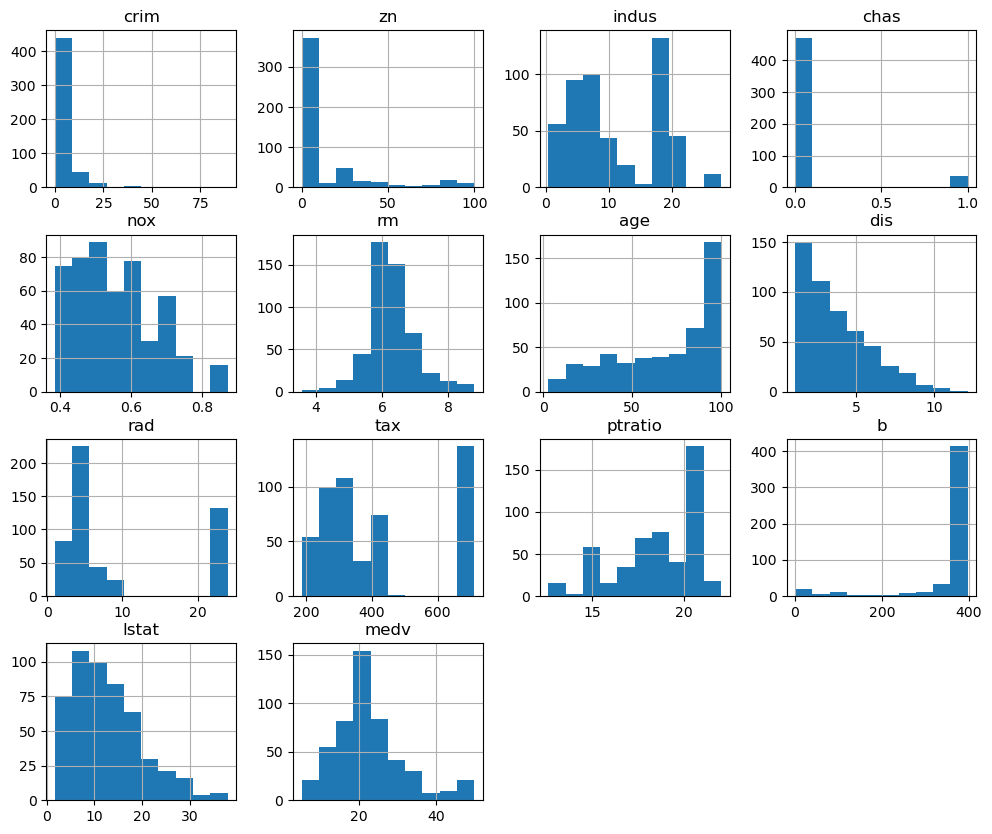

In [58]:
data.hist(figsize=(12, 10))
plt.show()

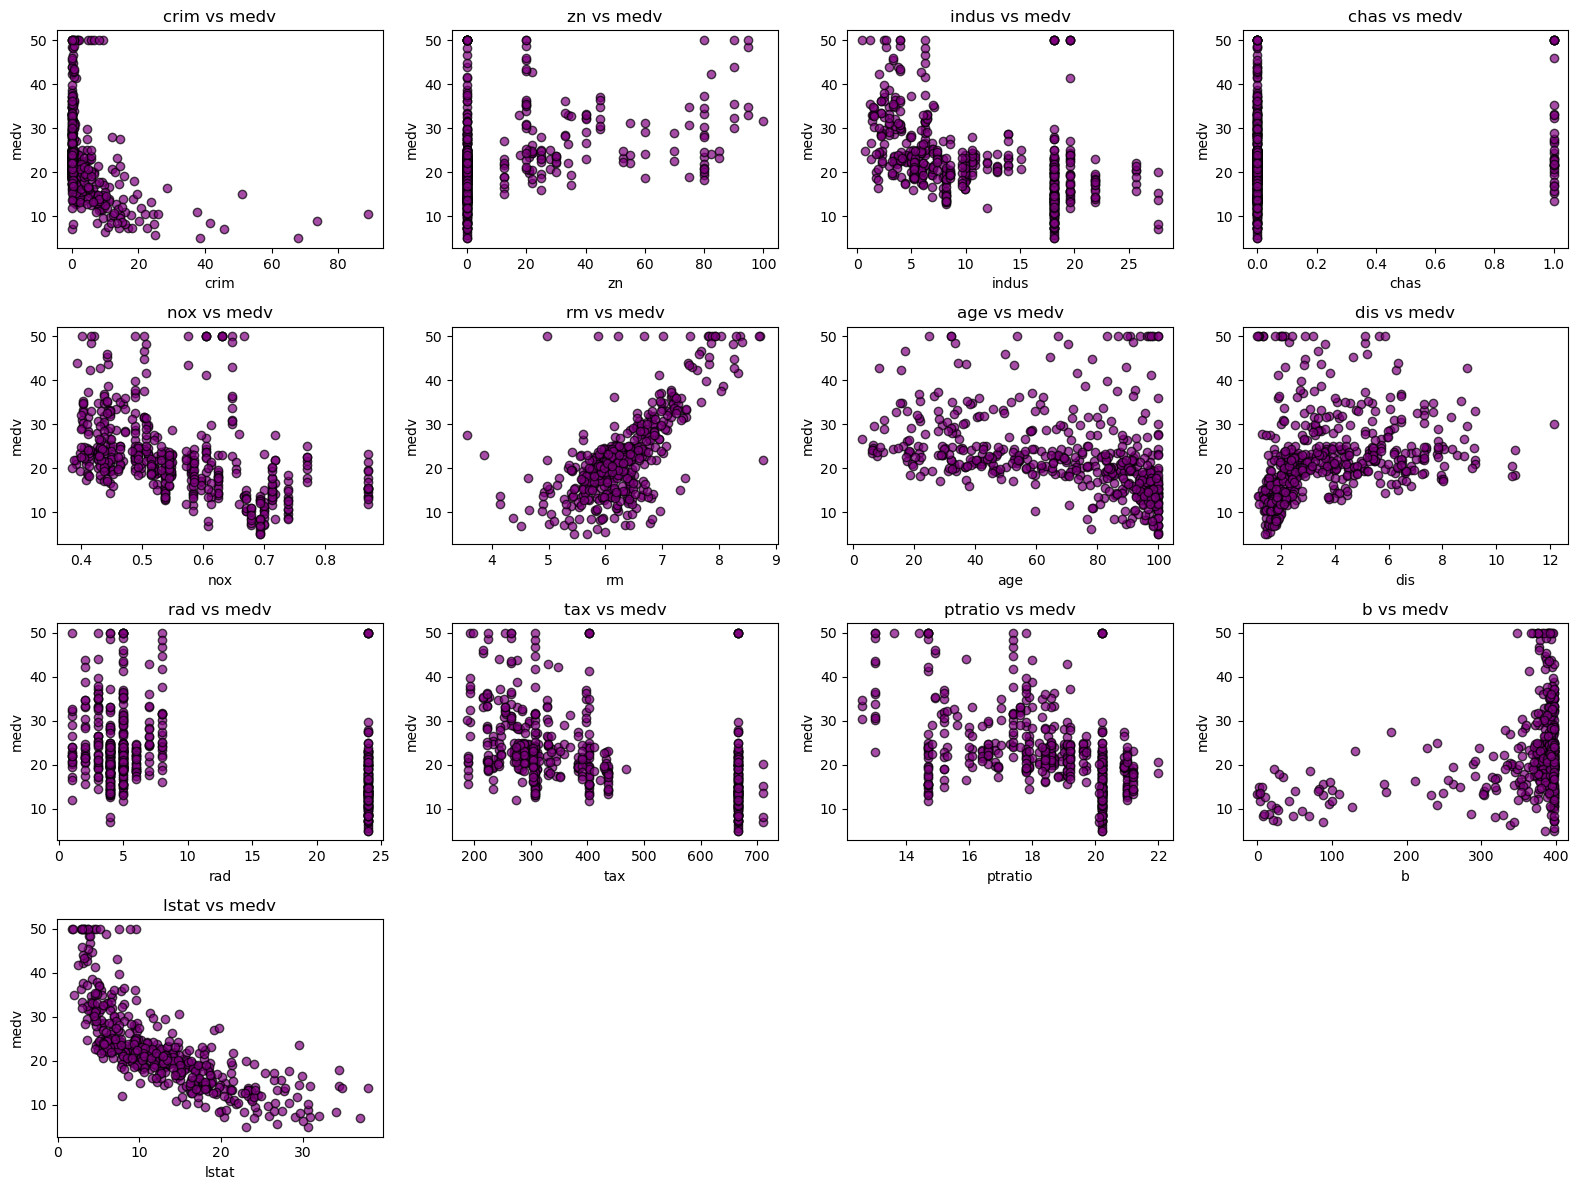

In [56]:
independent_vars = data.columns[:-1]
target = 'medv'

plt.figure(figsize=(16, 12))
for i, column in enumerate(independent_vars):
    plt.subplot(4, 4, i + 1)
    plt.scatter(data[column], data[target], color='purple', alpha=0.7, edgecolor='k') 
    plt.title(f'{column} vs {target}')
    plt.xlabel(column)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

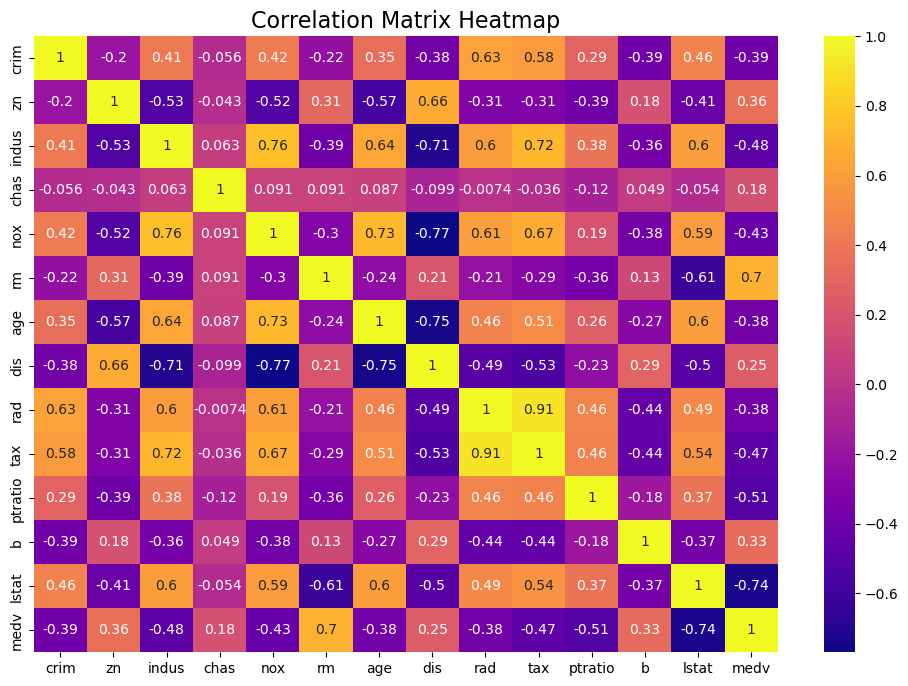

In [69]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

### Step 3: 3 Split the dataset into training and testing sets

In [136]:
X = data[['crim', 'zn',	'indus', 'chas',	'nox',	'rm',	'age',	'dis',	'rad',	'tax',	'ptratio',	'b', 'lstat']]
y = data[['medv']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Step 4 & 5 Combined
#### Implement the following regression models 
#### Evaluate the performance of each model using appropriate evaluation metrics, such as MAE, MSE, RMSE, R-squared, or Adjusted R-squared

In [176]:
#Simple Linear Regression (choose an appropriate feature)
X = data[['rm']]
y = data[['medv']]
model_slr = LinearRegression()
model_slr.fit(X_train, y_train)
y_pred = model_slr.predict(X_test)
mse_slr = mean_squared_error(y_test, y_pred)
r2_slr = r2_score(y_test, y_pred)
print(f"Mean Squared Error of Simple Linear regression = {mse_slr}")
print(f"R Squared of Simple Linear regression = {r2_slr}")

Mean Squared Error of Simple Linear regression = 24.291119474973613
R Squared of Simple Linear regression = 0.6687594935356307


In [178]:
# Multiple Linear Regression
X = data[['crim', 'zn',	'indus', 'chas',	'nox',	'rm',	'age',	'dis',	'rad',	'tax',	'ptratio',	'b', 'lstat']]
y = data[['medv']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model_mlr = LinearRegression()
model_mlr.fit(X_train, y_train)
y_pred = model_mlr.predict(X_test)
mse_mlr = mean_squared_error(y_test, y_pred)
r2_mlr = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_mlr = 1 - ((1 - r2_mlr) * (n - 1) / (n - p - 1))
print(f"Means Squared Error of Multiple Linear regression= {mse_mlr}")
print(f"R-Squared of Multiple Linear regression= {r2_mlr}")
print(f"Adjusted R-squared: {adjusted_r2_mlr:.4f}")

Means Squared Error of Multiple Linear regression= 24.291119474973613
R-Squared of Multiple Linear regression= 0.6687594935356307
Adjusted R-squared: 0.6198


In [184]:
# Polynomial Regression
X = data[['lstat']]
y = data[['medv']]
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model_polynomial = LinearRegression()
model_polynomial.fit(X_train_poly, y_train)
y_pred = model_polynomial.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of Polynomial Regression = {mse_poly}")

Mean Squared Error of Polynomial Regression = 14.183558227396002


In [188]:
# Ridge Regression & Lasso Regression

X = data[['crim', 'zn',	'indus', 'chas',	'nox',	'rm',	'age',	'dis',	'rad',	'tax',	'ptratio',	'b', 'lstat']]
y = data[['medv']]
model_ridge = Ridge(alpha=1)
model_lasso = Lasso(alpha=1)

model_ridge.fit(X_train, y_train)
model_lasso.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error (Ridge) = {mse_ridge}")
print(f"Mean Squared Error (Lasso) = {mse_lasso}")

Mean Squared Error (Ridge) = 24.47719122770868
Mean Squared Error (Lasso) = 24.409489761299696


In [200]:
# Support Vector Regression & Decision Tree Regression & Random Forest Regression

model_svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model_dtree = DecisionTreeRegressor(max_depth=3, random_state=42)
model_rforest = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

model_svr.fit(X_train, y_train)
model_dtree.fit(X_train, y_train)
model_rforest.fit(X_train, y_train)

y_pred_svr = model_svr.predict(X_test)
y_pred_dtree = model_dtree.predict(X_test)
y_pred_rforest = model_rforest.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
mse_rforest = mean_squared_error(y_test, y_pred_rforest)

r2_svr = r2_score(y_test, y_pred_svr)
r2_dtree = r2_score(y_test, y_pred_dtree)
r2_rforest = r2_score(y_test, y_pred_rforest)

print(f"Mean Squared Error SVR = {mse_svr}")
print(f"R-Squared SVR = {r2_svr}")
print(f"Mean Squared Error Decision Tree = {mse_dtree}")
print(f"R-Squared Decision Tree = {r2_dtree}")
print(f"Mean Squared Error Random Forest = {mse_rforest}")
print(f"R-Squared Random Forest = {r2_rforest}")

C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error SVR = 52.83836576796669
R-Squared SVR = 0.27948125010200286
Mean Squared Error Decision Tree = 16.766567150642494
R-Squared Decision Tree = 0.7713663958398644
Mean Squared Error Random Forest = 12.69298603704379
R-Squared Random Forest = 0.8269148884724211


### Step 6: Perform cross-validation and hyperparameter tuning for the models that require it, using grid search or randomized search

In [239]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rforest = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 14.858836289320982


### Step 7: Compare the performance of the different models and discuss your findings

In [235]:
print(f"Mean Squared Error of Simple Linear regression = {mse_slr}")
print(f"R Squared of Simple Linear regression = {r2_slr}")
print(f"Means Squared Error of Multiple Linear regression= {mse_mlr}")
print(f"R-Squared of Multiple Linear regression= {r2_mlr}")
print(f"Adjusted R-squared: {adjusted_r2_mlr:.4f}")
print(f"Mean Squared Error of Polynomial Regression = {mse_poly}")
print(f"Mean Squared Error (Ridge) = {mse_ridge}")
print(f"Mean Squared Error (Lasso) = {mse_lasso}")
print(f"Mean Squared Error SVR = {mse_svr}")
print(f"R-Squared SVR = {r2_svr}")
print(f"Mean Squared Error Decision Tree = {mse_dtree}")
print(f"R-Squared Decision Tree = {r2_dtree}")
print(f"Mean Squared Error Random Forest = {mse_rforest}")
print(f"R-Squared Random Forest = {r2_rforest}")

Mean Squared Error of Simple Linear regression = 24.291119474973613
R Squared of Simple Linear regression = 0.6687594935356307
Means Squared Error of Multiple Linear regression= 24.291119474973613
R-Squared of Multiple Linear regression= 0.6687594935356307
Adjusted R-squared: 0.6198
Mean Squared Error of Polynomial Regression = 14.183558227396002
Mean Squared Error (Ridge) = 24.47719122770868
Mean Squared Error (Lasso) = 24.409489761299696
Mean Squared Error SVR = 52.83836576796669
R-Squared SVR = 0.27948125010200286
Mean Squared Error Decision Tree = 16.766567150642494
R-Squared Decision Tree = 0.7713663958398644
Mean Squared Error Random Forest = 12.69298603704379
R-Squared Random Forest = 0.8269148884724211


In [215]:
model_evaluation_data = {'Model':['Linear', 'Multiple-Linear', 'Polynomial', 'Ridge', 'Lasso', 'Support Vector', 'Decison Tree', 'Random Forest'],
                   'MSE':[mse_slr, mse_mlr, mse_poly, mse_ridge, mse_lasso, mse_svr, mse_dtree, mse_rforest],
                    'R2':[r2_slr, r2_mlr, '', '', '', r2_svr, r2_dtree, r2_rforest],
                  'Adj-R2':['',adjusted_r2_mlr,'','','','','','']}
model_evaluation_df = pd.DataFrame(model_evaluation_data)
model_evaluation_df = model_evaluation_df.sort_values('MSE', ascending=True)
model_evaluation_df

,Model,MSE,R2,Adj-R2
7,Random Forest,12.692986,0.826915,
2,Polynomial,14.183558,,
6,Decison Tree,16.766567,0.771366,
0,Linear,24.291119,0.668759,
1,Multiple-Linear,24.291119,0.668759,0.619826
4,Lasso,24.409490,,
3,Ridge,24.477191,,
5,Support Vector,52.838366,0.279481,


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


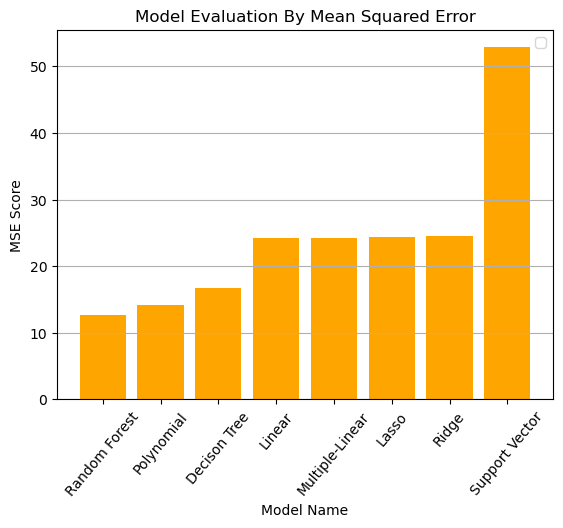

In [237]:
plt.bar(model_evaluation_df['Model'], model_evaluation_df['MSE'], color = 'orange')
plt.xlabel('Model Name')
plt.ylabel('MSE Score')
plt.title('Model Evaluation By Mean Squared Error')
plt.grid(axis='y')
plt.xticks(rotation=50)
plt.legend()
plt.show()

### Step 8: Choose the best model based on the evaluation metrics and provide insights into its performance and predictions

##### Results: The Best Model is Random Forest Regression model because it has the lowest mean squared error and highest R2